In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\win\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
atr=pd.read_csv("G:\data analytics\datasets\R Project - Attrition\Attrition.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
atr.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [5]:
##removing columns having 1 unique value and columns not required for model building
atr=atr.drop(['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis=1)

In [6]:
##converting some numerical variables into categorical variables for visualisation(EDA)
for col in ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','JobLevel']:
    atr[col]=atr[col].astype('object')

atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [7]:
atr.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.0,1470,1470.0,1470,1470.000000,1470.0,1470.0,1470,1470.0,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.0,1470.0,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,5.0,6,4.0,2,NaN,4.0,5.0,9,4.0,3,NaN,NaN,NaN,2,NaN,2.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,3.0,Life Sciences,3.0,Male,NaN,3.0,1.0,Sales Executive,4.0,Married,NaN,NaN,NaN,No,NaN,3.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,572.0,606,453.0,882,NaN,868.0,543.0,326,459.0,673,NaN,NaN,NaN,1054,NaN,1244.0,459.0,NaN,NaN,NaN,893.0,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,NaN,NaN,NaN,NaN,65.891156,NaN,NaN,NaN,NaN,NaN,6502.931293,14313.103401,2.693197,NaN,15.209524,NaN,NaN,0.793878,11.279592,2.799320,NaN,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,NaN,NaN,NaN,NaN,20.329428,NaN,NaN,NaN,NaN,NaN,4707.956783,7117.786044,2.498009,NaN,3.659938,NaN,NaN,0.852077,7.780782,1.289271,NaN,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,1009.000000,2094.000000,0.000000,NaN,11.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,2911.000000,8047.000000,1.000000,NaN,12.000000,NaN,NaN,0.000000,6.000000,2.000000,NaN,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,NaN,NaN,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,4919.000000,14235.500000,2.000000,NaN,14.000000,NaN,NaN,1.000000,10.000000,3.000000,NaN,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,NaN,NaN,NaN,NaN,83.750000,NaN,NaN,NaN,NaN,NaN,8379.000000,20461.500000,4.000000,NaN,18.000000,NaN,NaN,1.000000,15.000000,3.000000,NaN,9.000000,7.000000,3.000000,7.000000


In [8]:
atr.MonthlyIncome

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [9]:
atr.groupby('Attrition').WorkLifeBalance.value_counts(sum)

Attrition  WorkLifeBalance
No         3                  0.621249
           2                  0.231955
           4                  0.102190
           1                  0.044607
Yes        3                  0.535865
           2                  0.244726
           4                  0.113924
           1                  0.105485
Name: WorkLifeBalance, dtype: float64

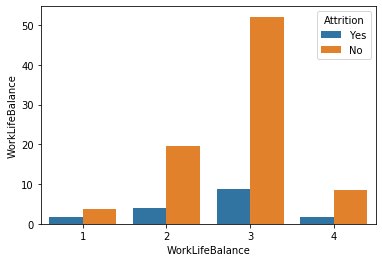

In [10]:
sns.barplot(x='WorkLifeBalance',y='WorkLifeBalance',data=atr,estimator=lambda x:len(x)/1470*100,hue=atr.Attrition,)

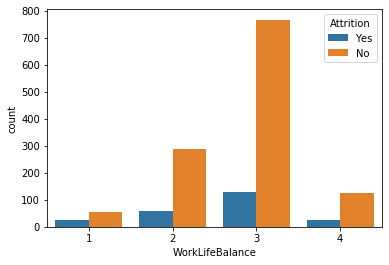

In [11]:
sns.countplot(atr.WorkLifeBalance,hue=atr.Attrition)
##As the worklife balance rating decreases the percentage of attrition increases

In [12]:
atr.groupby('Attrition').RelationshipSatisfaction.value_counts(sum)

Attrition  RelationshipSatisfaction
No         3                           0.314680
           4                           0.298459
           2                           0.209246
           1                           0.177616
Yes        3                           0.299578
           4                           0.270042
           1                           0.240506
           2                           0.189873
Name: RelationshipSatisfaction, dtype: float64

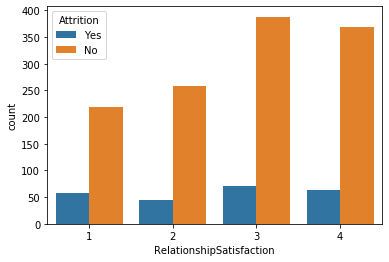

In [13]:
sns.countplot(atr.RelationshipSatisfaction,hue=atr.Attrition)
##as the satisfaction level decreases the percentage of attrition decreases 

In [14]:
atr.groupby('Attrition').OverTime.value_counts(sum)

Attrition  OverTime
No         No          0.765612
           Yes         0.234388
Yes        Yes         0.535865
           No          0.464135
Name: OverTime, dtype: float64

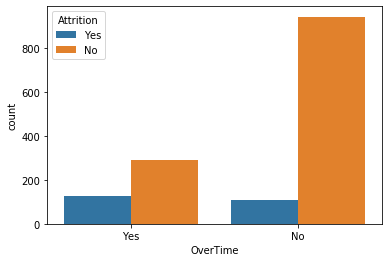

In [15]:
sns.countplot(atr.OverTime,hue=atr.Attrition)
##people working overtime have high percentage of leaving the organization

In [16]:
atr.groupby('Attrition').JobSatisfaction.value_counts(sum)

Attrition  JobSatisfaction
No         4                  0.330089
           3                  0.299270
           2                  0.189781
           1                  0.180860
Yes        3                  0.308017
           1                  0.278481
           4                  0.219409
           2                  0.194093
Name: JobSatisfaction, dtype: float64

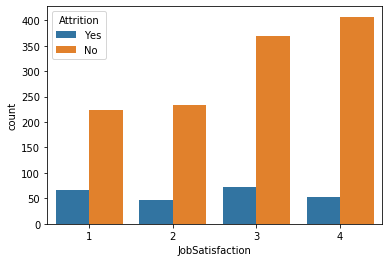

In [17]:
sns.countplot(atr.JobSatisfaction,hue=atr.Attrition)
####As the jobsatisfaction increase,the percentage of Attrition decreases

In [18]:
atr.groupby('Attrition').JobInvolvement.value_counts(sum)

Attrition  JobInvolvement
No         3                 0.602595
           2                 0.246553
           4                 0.106245
           1                 0.044607
Yes        3                 0.527426
           2                 0.299578
           1                 0.118143
           4                 0.054852
Name: JobInvolvement, dtype: float64

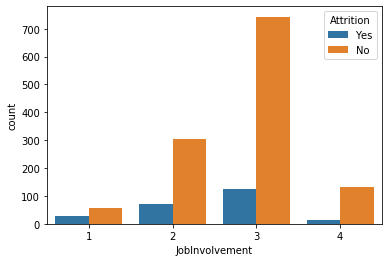

In [19]:
sns.countplot(atr.JobInvolvement,hue=atr.Attrition)
##As the JobInvolvement increases, the percentage of Attrition decreases

In [20]:
atr.groupby('Attrition').EnvironmentSatisfaction.value_counts(sum)

Attrition  EnvironmentSatisfaction
No         3                          0.317113
           4                          0.313058
           2                          0.197891
           1                          0.171938
Yes        1                          0.303797
           3                          0.261603
           4                          0.253165
           2                          0.181435
Name: EnvironmentSatisfaction, dtype: float64

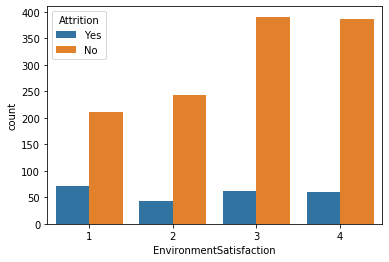

In [21]:
sns.countplot(atr.EnvironmentSatisfaction,hue=atr.Attrition)
##As the environmenatal satisfaction increases, the percentage of Attrition decreases

In [22]:
atr.groupby('Attrition').MaritalStatus.value_counts(sum)

Attrition  MaritalStatus
No         Married          0.477697
           Single           0.283861
           Divorced         0.238443
Yes        Single           0.506329
           Married          0.354430
           Divorced         0.139241
Name: MaritalStatus, dtype: float64

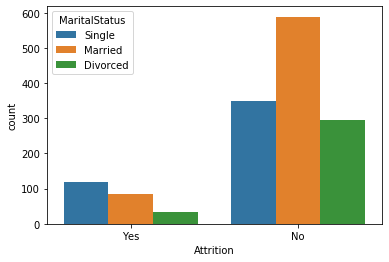

In [23]:
sns.countplot(atr.Attrition,hue=atr.MaritalStatus)
#from the chart it can be observed that single people(50% of Attritions) are more likely to leave the job and
#married people are more likely to stay

In [24]:
atr.groupby('Attrition').Gender.value_counts(sum)

Attrition  Gender
No         Male      0.593674
           Female    0.406326
Yes        Male      0.632911
           Female    0.367089
Name: Gender, dtype: float64

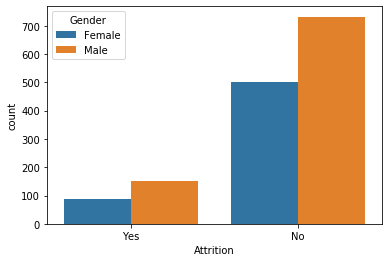

In [25]:
sns.countplot(atr.Attrition,hue=atr.Gender)

# it can be observe that in every satisfaction type column, as the satisfaction level decreases the percentage of Attrition increases thus we can create a new column by adding the satisfaction level i.e. create a new feature combining all satisfaction columns

In [26]:
satisfaction=atr.EnvironmentSatisfaction+atr.JobInvolvement+atr.JobSatisfaction+atr.RelationshipSatisfaction
satisfaction.mean()

10.892517006802722

In [27]:
ove_sat=pd.DataFrame({"env":atr.EnvironmentSatisfaction,'inv':atr.JobInvolvement,'sat':atr.JobSatisfaction})

In [28]:
ove_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   env     1470 non-null   object
 1   inv     1470 non-null   object
 2   sat     1470 non-null   object
dtypes: object(3)
memory usage: 34.6+ KB


In [29]:
ove_sat.median(axis=1)

0       3.0
1       2.0
2       3.0
3       3.0
4       2.0
       ... 
1465    4.0
1466    2.0
1467    2.0
1468    2.0
1469    3.0
Length: 1470, dtype: float64

In [30]:
##taking mean of satisfaction values, making all values between 1.0 to 4   
satisfaction=satisfaction/4
np.unique(satisfaction)

array([1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0],
      dtype=object)

In [31]:
##conbining the two data
atr=pd.concat([atr,satisfaction],axis=1)

In [32]:
atr=atr.rename(columns={0:'OverallSatisfaction'})

In [33]:
atr.groupby('OverallSatisfaction').Attrition.value_counts(sum)

OverallSatisfaction  Attrition
1.25                 Yes          0.555556
                     No           0.444444
1.50                 Yes          0.550000
                     No           0.450000
1.75                 No           0.675000
                     Yes          0.325000
2.00                 No           0.710280
                     Yes          0.289720
2.25                 No           0.796610
                     Yes          0.203390
2.50                 No           0.842697
                     Yes          0.157303
2.75                 No           0.882129
                     Yes          0.117871
3.00                 No           0.867925
                     Yes          0.132075
3.25                 No           0.902299
                     Yes          0.097701
3.50                 No           0.872727
                     Yes          0.127273
3.75                 No           0.942857
                     Yes          0.057143
4.00                 No

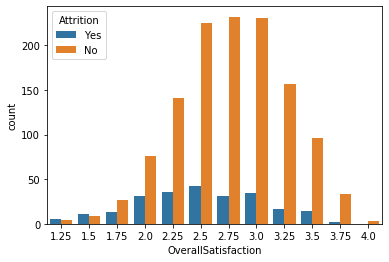

In [34]:
sns.countplot(atr.OverallSatisfaction,hue=atr.Attrition)

In [35]:
##converting columns into numerical  variables back again
for col in ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','JobLevel']:
    atr[col]=atr[col].astype('int64')

atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [36]:
atr.OverallSatisfaction=atr.OverallSatisfaction.astype('int64')
atr.OverallSatisfaction.describe()

count    1470.000000
mean        2.354422
std         0.571829
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: OverallSatisfaction, dtype: float64

In [37]:
atr=atr.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction'],axis=1)
atr.shape

(1470, 28)

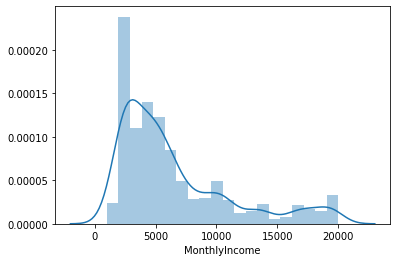

In [38]:
sns.distplot(atr.MonthlyIncome)

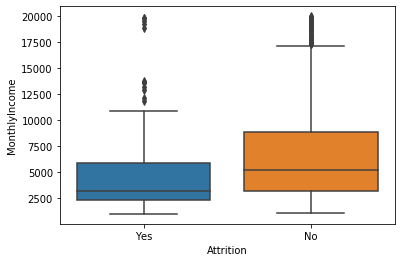

In [40]:
sns.boxplot(y=atr.MonthlyIncome,x=atr.Attrition)

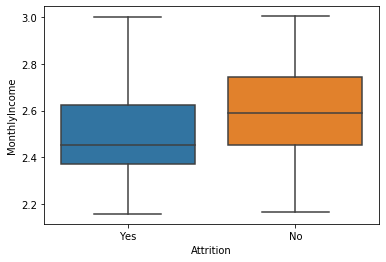

In [41]:
sns.boxplot(y=np.power(atr.MonthlyIncome,1/9),x=atr.Attrition)

In [42]:
##we will convert monthly income to its 1/9th power so that outliers are considered
atr.MonthlyIncome=np.power(atr.MonthlyIncome,1/9)

In [43]:
atr.describe()

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverallSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,65.891156,2.063946,2.593533,14313.103401,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,2.354422
std,9.135373,403.509100,8.106864,1.024165,20.329428,1.106940,0.193527,7117.786044,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.571829
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,2.156581,2094.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,1.000000,2.426016,8047.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,2.000000,2.571630,14235.500000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,2.000000
75%,43.000000,1157.000000,14.000000,4.000000,83.750000,3.000000,2.728414,20461.500000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,1499.000000,29.000000,5.000000,100.000000,5.000000,3.005314,26999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


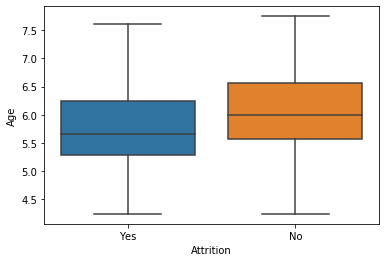

In [44]:
sns.boxplot(y=np.sqrt(atr.Age),x=atr.Attrition)

In [45]:
atr.Age=np.sqrt(atr.Age)

In [46]:
atr.describe()

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverallSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6.030218,802.485714,9.192517,2.912925,65.891156,2.063946,2.593533,14313.103401,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,2.354422
std,0.748773,403.509100,8.106864,1.024165,20.329428,1.106940,0.193527,7117.786044,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.571829
min,4.242641,102.000000,1.000000,1.000000,30.000000,1.000000,2.156581,2094.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.477226,465.000000,2.000000,2.000000,48.000000,1.000000,2.426016,8047.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,6.000000,802.000000,7.000000,3.000000,66.000000,2.000000,2.571630,14235.500000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,2.000000
75%,6.557439,1157.000000,14.000000,4.000000,83.750000,3.000000,2.728414,20461.500000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,7.745967,1499.000000,29.000000,5.000000,100.000000,5.000000,3.005314,26999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


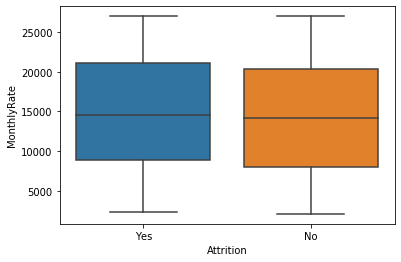

In [47]:
sns.boxplot(y=atr.MonthlyRate,x=atr.Attrition)

In [48]:
atr.describe()

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverallSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6.030218,802.485714,9.192517,2.912925,65.891156,2.063946,2.593533,14313.103401,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,2.354422
std,0.748773,403.509100,8.106864,1.024165,20.329428,1.106940,0.193527,7117.786044,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.571829
min,4.242641,102.000000,1.000000,1.000000,30.000000,1.000000,2.156581,2094.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.477226,465.000000,2.000000,2.000000,48.000000,1.000000,2.426016,8047.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,6.000000,802.000000,7.000000,3.000000,66.000000,2.000000,2.571630,14235.500000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,2.000000
75%,6.557439,1157.000000,14.000000,4.000000,83.750000,3.000000,2.728414,20461.500000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,7.745967,1499.000000,29.000000,5.000000,100.000000,5.000000,3.005314,26999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [49]:
atr_df=atr.loc[:,['DailyRate','HourlyRate','MonthlyRate']]
atr_df.describe()

,DailyRate,HourlyRate,MonthlyRate
count,1470.000000,1470.000000,1470.000000
mean,802.485714,65.891156,14313.103401
std,403.509100,20.329428,7117.786044
min,102.000000,30.000000,2094.000000
25%,465.000000,48.000000,8047.000000
50%,802.000000,66.000000,14235.500000
75%,1157.000000,83.750000,20461.500000
max,1499.000000,100.000000,26999.000000


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [51]:
atr_df=scaler.fit_transform(atr_df)
atr_df

array([[0.71581961, 0.91428571, 0.6980526 ],
       [0.12670007, 0.44285714, 0.9160008 ],
       [0.90980673, 0.88571429, 0.01212608],
       ...,
       [0.03793844, 0.81428571, 0.12366995],
       [0.65926986, 0.47142857, 0.44766111],
       [0.37652112, 0.74285714, 0.32660108]])

In [52]:
atr_Df=pd.DataFrame({'DailyRate':atr_df[:,0],'HourlyRate':atr_df[:,1],'MonthlyRate':atr_df[:,2]})
atr_Df.head()

,DailyRate,HourlyRate,MonthlyRate
0,0.715820,0.914286,0.698053
1,0.126700,0.442857,0.916001
2,0.909807,0.885714,0.012126
3,0.923407,0.371429,0.845814
4,0.350036,0.142857,0.583738


In [53]:
atr.shape

(1470, 28)

In [54]:
atr=atr.drop(['DailyRate','HourlyRate','MonthlyRate'],axis=1)
atr.shape

(1470, 25)

In [55]:
atr=pd.concat([atr,atr_Df],axis=1)
atr.shape

(1470, 28)

In [56]:
atr_cat=atr.select_dtypes('object')
atr_cat=atr_cat.drop(['Attrition'],axis=1)

In [57]:
##converting categorical features into numerical features for model building
atr=pd.get_dummies(atr,columns=atr_cat.columns,drop_first=True)
atr.shape

(1470, 42)

In [58]:
X=atr.drop(['Attrition'],axis=1)
Y=atr.Attrition

In [59]:
Y.replace({'Yes':1,'No':0},inplace=True)

In [60]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smt=SMOTE()

Using TensorFlow backend.


In [61]:
X.shape

(1470, 41)

In [62]:
Y.shape

(1470,)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)
xtrain,ytrain=smt.fit_sample(x_train,y_train)

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(min_samples_split=200)

In [66]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
confusion_matrix(dtree.predict(x_test),y_test)

array([[236,  33],
       [ 13,  12]], dtype=int64)

In [68]:
print(classification_report(dtree.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       269
           1       0.27      0.48      0.34        25

    accuracy                           0.84       294
   macro avg       0.61      0.68      0.63       294
weighted avg       0.89      0.84      0.86       294



In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)

In [74]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
confusion_matrix(rfc.predict(x_test),y_test)

array([[246,  37],
       [  3,   8]], dtype=int64)

In [76]:
print(classification_report(rfc.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       283
           1       0.18      0.73      0.29        11

    accuracy                           0.86       294
   macro avg       0.58      0.80      0.61       294
weighted avg       0.96      0.86      0.90       294



In [77]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(dtree,n_estimators=100)

In [78]:
abc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=200,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                     

In [79]:
confusion_matrix(abc.predict(x_test),y_test)

array([[232,  34],
       [ 17,  11]], dtype=int64)

In [80]:
print(classification_report(abc.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       266
           1       0.24      0.39      0.30        28

    accuracy                           0.83       294
   macro avg       0.59      0.63      0.60       294
weighted avg       0.87      0.83      0.84       294



In [81]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [82]:
logmodel.fit(x_train,y_train)

C:\Users\win\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
confusion_matrix(y_test,logmodel.predict(x_test))

array([[239,  10],
       [ 28,  17]], dtype=int64)

In [84]:
print(classification_report(y_test,logmodel.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       249
           1       0.63      0.38      0.47        45

    accuracy                           0.87       294
   macro avg       0.76      0.67      0.70       294
weighted avg       0.85      0.87      0.86       294



In [85]:
from sklearn.naive_bayes import MultinomialNB
nbay=MultinomialNB()

In [86]:
nbay.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [87]:
print(classification_report(nbay.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78       187
           1       0.60      0.25      0.36       107

    accuracy                           0.67       294
   macro avg       0.64      0.58      0.57       294
weighted avg       0.65      0.67      0.62       294



In [88]:
from sklearn.svm import SVC
svcmodel=SVC()

In [89]:
svcmodel.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
print(classification_report(svcmodel.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       294
           1       0.00      0.00      0.00         0

    accuracy                           0.85       294
   macro avg       0.50      0.42      0.46       294
weighted avg       1.00      0.85      0.92       294



C:\Users\win\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [92]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       280
           1       0.11      0.36      0.17        14

    accuracy                           0.83       294
   macro avg       0.54      0.61      0.54       294
weighted avg       0.92      0.83      0.87       294



In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Creating data frame for models score and selecting best model

In [95]:
models=['dtree','rfc','abc','logmodel','nbay','knn','svm']
accuracy=[accuracy_score(dtree.predict(x_test),y_test),accuracy_score(rfc.predict(x_test),y_test),accuracy_score(abc.predict(x_test),y_test),accuracy_score(logmodel.predict(x_test),y_test),accuracy_score(nbay.predict(x_test),y_test),accuracy_score(knn.predict(x_test),y_test),accuracy_score(svcmodel.predict(x_test),y_test)]
f1_score=[f1_score(dtree.predict(x_test),y_test),f1_score(rfc.predict(x_test),y_test),f1_score(abc.predict(x_test),y_test),f1_score(logmodel.predict(x_test),y_test),f1_score(nbay.predict(x_test),y_test),f1_score(knn.predict(x_test),y_test),f1_score(svcmodel.predict(x_test),y_test)]

df_model=pd.DataFrame({'Models':models,"Accuracy":accuracy,'f1_score':f1_score})

In [96]:
df_model

,Models,Accuracy,f1_score
0,dtree,0.843537,0.342857
1,rfc,0.863946,0.285714
2,abc,0.826531,0.301370
3,logmodel,0.870748,0.472222
4,nbay,0.666667,0.355263
5,knn,0.833333,0.169492
6,svm,0.846939,0.000000
